In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/features_30_sec_updated (1).csv')

In [ ]:
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc20_var,ber_mean,ber_var,amplitude_envelop_mean,amplitude_envelop_var,spectral_contrast_mean,spectral_contrast_var,tempogram_mean,tempogram_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,46.936035,54.381985,2.782416e+03,0.375375,0.019717,20.523289,14.131953,0.152354,0.033286,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,45.786282,504.342800,1.427558e+06,0.288863,0.021377,20.672486,19.491224,0.117850,0.023207,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,30.573025,190.589230,1.413872e+06,0.501379,0.020287,22.191292,17.411253,0.134947,0.026662,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,31.949339,2780.821500,4.304921e+07,0.344977,0.032217,21.423621,15.598925,0.112285,0.021143,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,55.195160,112.069980,5.638682e+04,0.329738,0.029974,21.459618,18.183767,0.134064,0.026170,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,reggae.00065.wav,661504,0.375875,0.095465,0.298198,0.014570,2081.122071,881704.519371,2264.722433,439257.764603,...,37.936478,430.299350,2.163229e+06,0.784294,0.058264,18.119293,17.135859,0.116145,0.023772,reggae
866,reggae.00066.wav,661504,0.389325,0.093108,0.129168,0.002650,1628.979106,335237.211043,1886.163413,148036.103870,...,42.880890,212.307280,1.645302e+05,0.372186,0.022056,19.713676,21.398757,0.118297,0.024717,reggae
867,reggae.00067.wav,661504,0.396073,0.089904,0.140145,0.001966,1728.254305,272396.938416,2361.404749,196427.957544,...,43.801132,263.315160,2.792091e+05,0.411537,0.019304,17.930705,13.950828,0.136543,0.029183,reggae
868,reggae.00068.wav,661504,0.358508,0.100264,0.095358,0.001786,2104.462897,897189.126598,2311.178742,196608.686893,...,68.953163,449.133420,3.335780e+06,0.265212,0.017883,19.859114,21.141996,0.124704,0.024166,reggae


In [ ]:
df.drop('filename' , axis = 1 , inplace = True)
df.drop('length' , axis = 1 , inplace = True)

In [ ]:
X = df.drop('label', axis=1).values
y = df['label'].values

In [ ]:
print(X.shape)
print(y.shape)

(870, 65)
(870,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,f1_score


imputer = SimpleImputer(strategy='mean')


DT_classifier = DecisionTreeClassifier()


pipeline = Pipeline([
    ('imputer', imputer),
    ('classifier', DT_classifier)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.46
F1 Score: 0.45


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

imputer = SimpleImputer(strategy='mean')


scaler = StandardScaler()

scores = []

for i in range(1,16):


    knn_classifier = KNeighborsClassifier(n_neighbors=i)

    pipeline = Pipeline([
        ('imputer', imputer),
        ('scaler', scaler),
        ('classifier', knn_classifier)
    ])

    pipeline.fit(X_train_knn,y_train)

    y_pred = pipeline.predict(X_test_knn)

    scores.append(accuracy_score(y_test, y_pred))

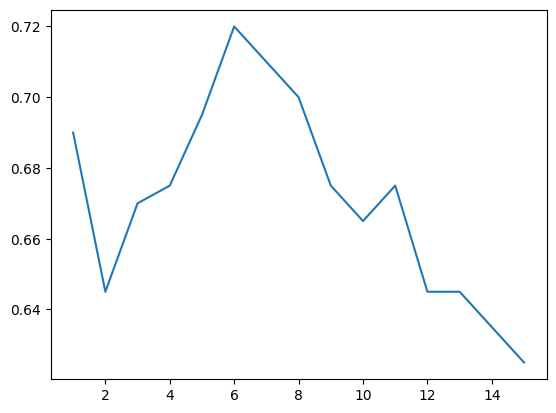

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=6)

pipeline = Pipeline([
        ('imputer', imputer),
        ('scaler', scaler),
        ('classifier', knn_classifier)
    ])

pipeline.fit(X_train_knn,y_train)
y_pred = pipeline.predict(X_test_knn)
accuracy_score(y_test, y_pred)

0.72

In [ ]:
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, y_pred)

Text(95.72222222222221, 0.5, 'Truth')

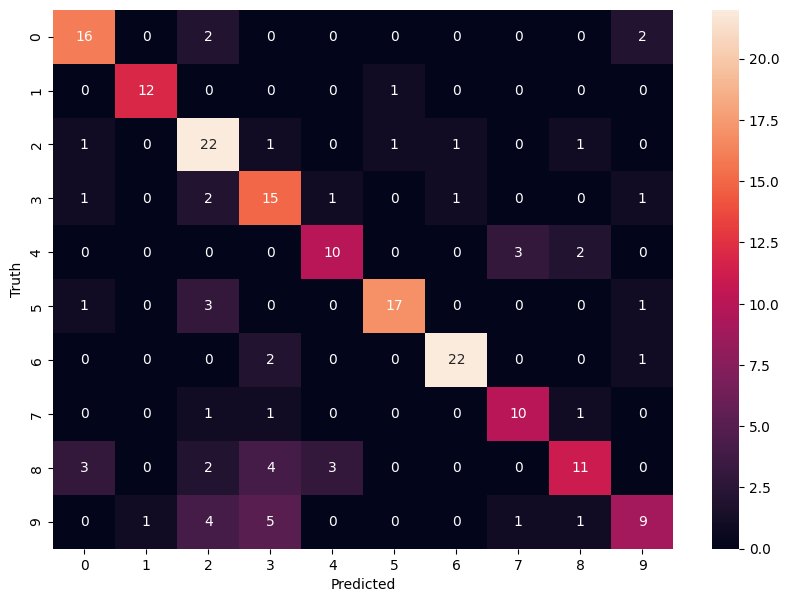

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(knn_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import Pipeline
# import numpy as np

# optimal_n_estimators = 35
# optimal_max_depth = 9
# optimal_min_samples_split = 6
# optimal_min_samples_leaf = 3


# clf1 = LogisticRegression(max_iter=1000)
# clf2 = RandomForestClassifier(n_estimators=optimal_n_estimators,
#     max_depth=optimal_max_depth,
#     min_samples_split=optimal_min_samples_split,
#     min_samples_leaf=optimal_min_samples_leaf,
#     n_jobs=-1)
# clf3 = KNeighborsClassifier(n_neighbors=6)
# clf4 = SVC(probability=True, kernel='poly', degree=3)

# estimators = [
#     ('lr', clf1),
#     ('rf', clf2),
#     ('knn', clf3),
#     ('svm', clf4)
# ]

# for name, clf in estimators:
#     pipeline = Pipeline([
#         ('imputer', SimpleImputer(strategy='mean')),
#         ('scaler', StandardScaler()),
#         (name, clf)
#     ])
#     scores = cross_val_score(pipeline, X_train, y_train, cv=15, scoring='accuracy')
#     print(f"{name}: {np.round(np.mean(scores), 2)}")


from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np

optimal_n_estimators = 35
optimal_max_depth = 9
optimal_min_samples_split = 6
optimal_min_samples_leaf = 3


clf1 = LogisticRegression(max_iter=1000)
clf2 = RandomForestClassifier(n_estimators=optimal_n_estimators,
    max_depth=optimal_max_depth,
    min_samples_split=optimal_min_samples_split,
    min_samples_leaf=optimal_min_samples_leaf,
    n_jobs=-1)
clf3 = KNeighborsClassifier(n_neighbors=6)
clf4 = SVC(probability=True, kernel='poly', degree=3)

estimators = [
    ('lr', clf1),
    ('rf', clf2),
    ('knn', clf3),
    ('svm', clf4)
]

results = []

for name, clf in estimators:
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        (name, clf)
    ])


    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))


for name, accuracy in results:
    print(f"{name}: {np.round(accuracy, 2)}")


lr: 0.72
rf: 0.66
knn: 0.72
svm: 0.61


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np


clf1 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

clf2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=optimal_n_estimators,
                                  max_depth=optimal_max_depth,
                                  min_samples_split=optimal_min_samples_split,
                                  min_samples_leaf=optimal_min_samples_leaf,
                                  n_jobs=-1))
])

clf3 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=6))
])

clf4 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, kernel='poly', degree=3))
])


estimators = [
    ('lr', clf1),
    ('rf', clf2),
    ('knn', clf3),
    ('svm', clf4)
]

vc = VotingClassifier(estimators=estimators, voting='hard')

scores = cross_val_score(vc, X_train, y_train, cv=10, scoring='accuracy')
print(np.round(np.mean(scores), 2))


0.74


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np


clf1 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

clf2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=optimal_n_estimators,
                                  max_depth=optimal_max_depth,
                                  min_samples_split=optimal_min_samples_split,
                                  min_samples_leaf=optimal_min_samples_leaf,
                                  n_jobs=-1))
])

clf3 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=6))
])

clf4 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, kernel='poly', degree=3))
])


estimators = [
    ('lr', clf1),
    ('rf', clf2),
    ('knn', clf3),
    ('svm', clf4)
]

vc = VotingClassifier(estimators=estimators, voting='soft')

scores = cross_val_score(vc, X_train, y_train, cv=10, scoring='accuracy')
print(np.round(np.mean(scores), 2))


0.77


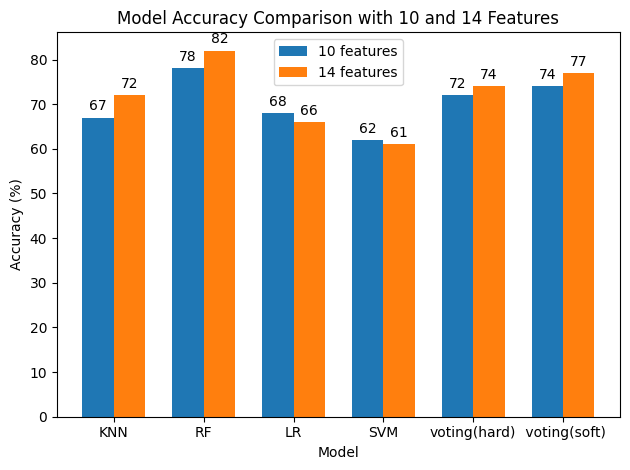

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


models = ['KNN', 'RF', 'LR', 'SVM', 'voting(hard)' , ' voting(soft)']
accuracy_10_features = [67, 78, 68, 62, 72,74]
accuracy_14_features = [72, 82, 66, 61, 74,77]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_10_features, width, label='10 features')
rects2 = ax.bar(x + width/2, accuracy_14_features, width, label='14 features')


ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison with 10 and 14 Features')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score



pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', XGBClassifier())
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7759
